# Employee Attrition Data


In [1]:
#Prepare a model for the HR department to predict the Attrition and give the insights from the data about the important factors associated

#with the attrition so that HR can take the corrective or preventive measures to stop or control the attrition.


In [2]:
#The steps we will go through are:
#Data preprocessing
#Data analysis
#Model training
#Model validation
#Model predictions
#Visualization of results

## Data Preprocessing

### importing the data from dataset(csv file)

In [3]:
import time
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV
from IPython.display import Image 
plt.style.use('ggplot')
pd.set_option('display.max_columns',500)

In [4]:
dataset = pd.read_csv('HR_Employee_Attrition_Data.csv')

In [5]:
dataset

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,3,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,5,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2935,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2936,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
2936,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2937,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
2937,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2938,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
2938,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2939,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8


#### CREATE DUPLICATE DATASET


In [6]:
df = dataset

#### To know the total no.of columns , no.of rows and the data types

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       2940 non-null   int64 
 1   Attrition                 2940 non-null   object
 2   BusinessTravel            2940 non-null   object
 3   DailyRate                 2940 non-null   int64 
 4   Department                2940 non-null   object
 5   DistanceFromHome          2940 non-null   int64 
 6   Education                 2940 non-null   int64 
 7   EducationField            2940 non-null   object
 8   EmployeeCount             2940 non-null   int64 
 9   EmployeeNumber            2940 non-null   int64 
 10  EnvironmentSatisfaction   2940 non-null   int64 
 11  Gender                    2940 non-null   object
 12  HourlyRate                2940 non-null   int64 
 13  JobInvolvement            2940 non-null   int64 
 14  JobLevel                

#### we cant analyse the whole dataset. so, let us take the sample.

In [8]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,3,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,5,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


#### get the number of rows and columns


In [9]:
df.shape

(2940, 35)

#### If we want to predict through random sample.

In [10]:
df.sample(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
463,26,Yes,Travel_Rarely,471,Research & Development,24,3,Technical Degree,1,464,3,Male,66,1,1,Laboratory Technician,4,Single,2340,23213,1,Y,Yes,18,3,2,80,0,1,3,1,1,0,0,0
2269,42,No,Travel_Rarely,469,Research & Development,2,2,Medical,1,2270,4,Male,35,3,4,Manager,1,Married,17665,14399,0,Y,No,17,3,4,80,1,23,3,3,22,6,13,7
142,38,No,Travel_Rarely,364,Research & Development,3,5,Technical Degree,1,143,4,Female,32,3,2,Research Scientist,3,Single,4317,2302,3,Y,Yes,20,4,2,80,0,19,2,3,3,2,2,2
1902,34,No,Travel_Rarely,1303,Research & Development,2,4,Life Sciences,1,1903,4,Male,62,2,1,Research Scientist,3,Divorced,2768,8416,3,Y,No,12,3,3,80,1,14,3,3,7,3,5,7
1029,40,No,Non-Travel,663,Research & Development,9,4,Other,1,1030,3,Male,81,3,2,Laboratory Technician,3,Divorced,3975,23099,3,Y,No,11,3,3,80,2,11,2,4,8,7,0,7


#### Get a count of the empty values for each column


In [11]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [12]:
#checking for null values in the data
df.isnull().values.any()

False

#### Five number summary


In [13]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,2940.000000,2940.000000,2940.000000,2940.000000,2940.0,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.0,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1470.500000,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.133819,403.440447,8.105485,1.023991,0.0,848.849221,1.092896,20.325969,0.711440,1.106752,1.102658,4707.155770,7116.575021,2.497584,3.659315,0.360762,1.081025,0.0,0.851932,7.779458,1.289051,0.706356,6.125483,3.622521,3.221882,3.567529
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,735.750000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8045.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1470.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,2205.250000,4.000000,84.000000,3.000000,3.000000,4.000000,8380.000000,20462.000000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2940.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [14]:
#get the count of the no.of the employees that stayed and left the company
df['Attrition'].value_counts()

No     2466
Yes     474
Name: Attrition, dtype: int64

In [15]:
df['Gender'].value_counts()

Male      1764
Female    1176
Name: Gender, dtype: int64

In [16]:
df['BusinessTravel'].value_counts()

Travel_Rarely        2086
Travel_Frequently     554
Non-Travel            300
Name: BusinessTravel, dtype: int64

<AxesSubplot:xlabel='Attrition', ylabel='count'>

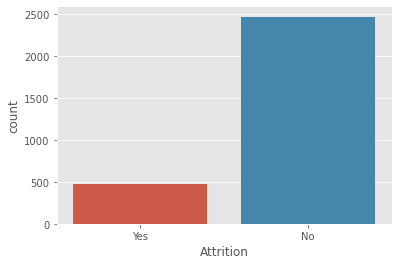

In [17]:
import warnings
warnings.filterwarnings('ignore')

#visualize the no.of employees that stayed and left the company
sns.countplot(df['Attrition'])

### This is the percentage if we just guessed no for Attrition


In [18]:
(2466-474)/2466

0.8077858880778589

### 80% employees dont want to leave the company whereas 20% employees wants to leave the company

<AxesSubplot:xlabel='Age', ylabel='count'>

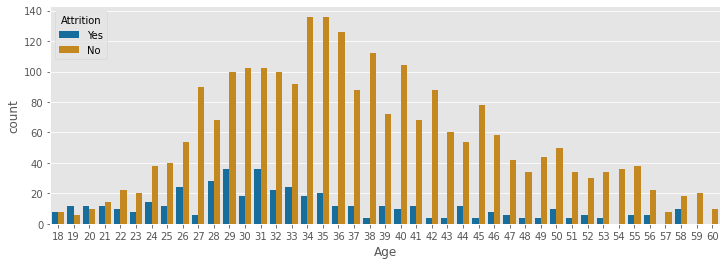

In [19]:
plt.subplots(figsize=(12,4))
sns.countplot(x = 'Age' , hue = 'Attrition' , data = df,palette= 'colorblind')

<AxesSubplot:xlabel='Gender', ylabel='count'>

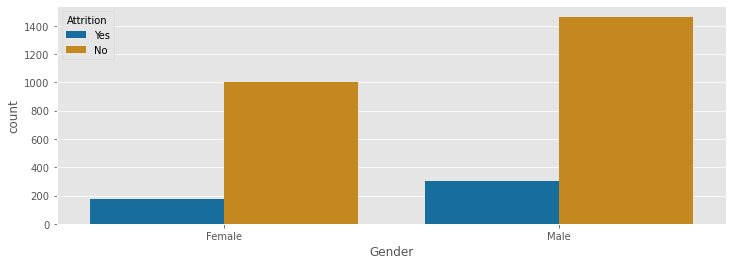

In [20]:
plt.subplots(figsize=(12,4))
sns.countplot(x = 'Gender' , hue = 'Attrition' , data = df,palette= 'colorblind')

### Here,from the chart it's visible that attrition heavily depends on males,also we can see that it's either male or female but more of them are staying in the company.

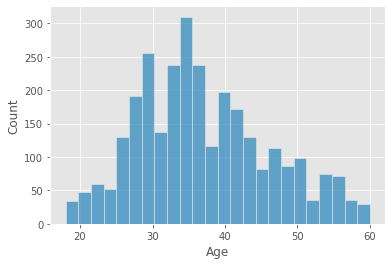

In [21]:
sns.histplot(x ='Age', data=df )
plt.show()


### In the above graph we can observe that the age group of 25 to 45 are the people who mostly interested in attretion

<AxesSubplot:xlabel='BusinessTravel', ylabel='count'>

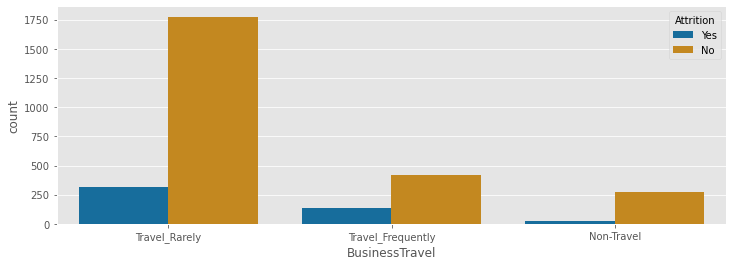

In [22]:
plt.subplots(figsize=(12,4))
sns.countplot(x = 'BusinessTravel' , hue = 'Attrition' , data = df,palette= 'colorblind')

<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

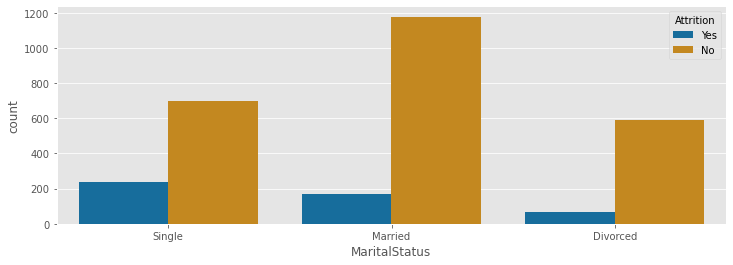

In [23]:
plt.subplots(figsize=(12,4))
sns.countplot(x = 'MaritalStatus' , hue = 'Attrition' , data = df,palette= 'colorblind')


### single employees are more likely to leave the company

# Boxplot visualisation:

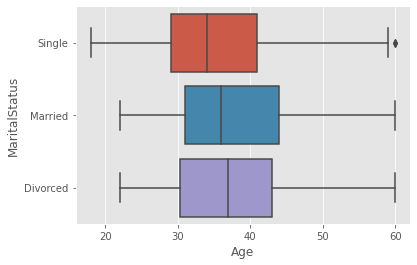

In [24]:
sns.boxplot( x="Age", y='MaritalStatus', data=df, )
plt.show()

<AxesSubplot:xlabel='TotalWorkingYears'>

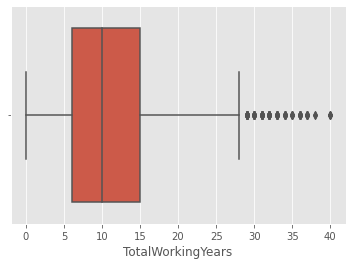

In [25]:
sns.boxplot(x='TotalWorkingYears', data=df)

## Removing outliers


In [26]:
Q1 = np.percentile(df['TotalWorkingYears'], 25,
                interpolation = 'midpoint')

Q3 = np.percentile(df['TotalWorkingYears'], 75,
                interpolation = 'midpoint')
IQR = Q3-Q1

Old Shape:  (2940, 35)
New Shape:  (2814, 35)


<AxesSubplot:xlabel='TotalWorkingYears'>

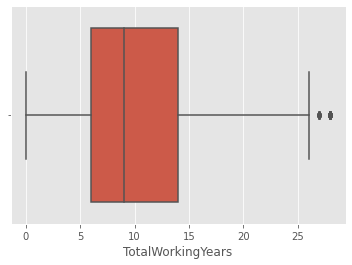

In [27]:
print("Old Shape: ", df.shape)
  
# Upper bound
upper = np.where(df['TotalWorkingYears'] >= (Q3+1.5*IQR))
  
# Lower bound
lower = np.where(df['TotalWorkingYears'] <= (Q1-1.5*IQR))
  
# Removing the Outliers
df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)
  
print("New Shape: ", df.shape)
  
sns.boxplot(x='TotalWorkingYears', data=df)

## Print all the data types and their unique values


In [28]:
for column in df.columns:
    if df[column].dtype == object:
        print(str(column) + ':' + str(df[column].unique()))
        print(df[column].value_counts())
        print('________________________________________________')

Attrition:['Yes' 'No']
No     2350
Yes     464
Name: Attrition, dtype: int64
________________________________________________
BusinessTravel:['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Travel_Rarely        1990
Travel_Frequently     536
Non-Travel            288
Name: BusinessTravel, dtype: int64
________________________________________________
Department:['Sales' 'Research & Development' 'Human Resources']
Research & Development    1840
Sales                      858
Human Resources            116
Name: Department, dtype: int64
________________________________________________
EducationField:['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Life Sciences       1160
Medical              878
Marketing            304
Technical Degree     260
Other                162
Human Resources       50
Name: EducationField, dtype: int64
________________________________________________
Gender:['Female' 'Male']
Male      1696
Female    1118
Name: Gender, dtype

### remove some useless columns


In [29]:
df = df.drop('Over18',axis=1)
df = df.drop('EmployeeNumber',axis=1)


In [30]:
df = df.drop('EmployeeCount',axis=1)
df = df.drop('StandardHours',axis=1)
df = df.drop('YearsAtCompany',axis=1)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2814 entries, 0 to 2939
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       2814 non-null   int64 
 1   Attrition                 2814 non-null   object
 2   BusinessTravel            2814 non-null   object
 3   DailyRate                 2814 non-null   int64 
 4   Department                2814 non-null   object
 5   DistanceFromHome          2814 non-null   int64 
 6   Education                 2814 non-null   int64 
 7   EducationField            2814 non-null   object
 8   EnvironmentSatisfaction   2814 non-null   int64 
 9   Gender                    2814 non-null   object
 10  HourlyRate                2814 non-null   int64 
 11  JobInvolvement            2814 non-null   int64 
 12  JobLevel                  2814 non-null   int64 
 13  JobRole                   2814 non-null   object
 14  JobSatisfaction         

### CORRELATION

In [32]:
df.corr()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.018769,0.004966,0.193544,-0.005994,0.035788,0.038383,0.425480,-0.006891,0.410650,0.001010,0.298087,0.006306,-0.000933,0.045812,0.054136,0.610507,-0.000696,-0.009434,0.174964,0.171850,0.164593
DailyRate,0.018769,1.000000,0.001778,-0.021801,0.020842,0.025610,0.043723,0.005732,0.027580,0.010678,-0.025330,0.040860,0.022993,-0.004052,0.003713,0.039691,0.029560,0.004082,-0.036732,0.025502,-0.019613,-0.018639
DistanceFromHome,0.004966,0.001778,1.000000,0.008664,-0.013908,0.023447,0.010046,0.016001,-0.013663,-0.006306,0.028741,-0.024094,0.034935,0.022716,0.006571,0.048073,0.017698,-0.036382,-0.025758,0.017340,0.013521,0.014127
Education,0.193544,-0.021801,0.008664,1.000000,-0.028460,0.009429,0.038286,0.074279,-0.016764,0.065648,-0.029008,0.132823,-0.015879,-0.033065,-0.012850,0.021082,0.118928,-0.027059,0.006937,0.047937,0.041249,0.045665
EnvironmentSatisfaction,-0.005994,0.020842,-0.013908,-0.028460,1.000000,-0.046552,-0.011888,-0.014790,-0.007493,-0.024583,0.036249,0.004907,-0.035320,-0.032720,0.021754,0.011139,-0.032540,-0.013085,0.035372,0.010769,0.019699,-0.002985
HourlyRate,0.035788,0.025610,0.023447,0.009429,-0.046552,1.000000,0.040305,-0.025299,-0.080989,-0.012923,-0.009930,0.030536,-0.011288,-0.003567,0.001196,0.053274,0.009928,-0.010926,-0.011955,-0.023486,-0.030585,-0.015453
JobInvolvement,0.038383,0.043723,0.010046,0.038286,-0.011888,0.040305,1.000000,-0.009290,-0.011454,-0.015794,-0.007935,0.006737,-0.017174,-0.030874,0.033153,0.013915,0.001115,-0.007774,-0.009080,0.010937,-0.018159,0.031533
JobLevel,0.425480,0.005732,0.016001,0.074279,-0.014790,-0.025299,-0.009290,1.000000,0.000814,0.942139,0.014971,0.127983,-0.038725,-0.029605,0.005976,0.026982,0.744879,-0.004359,0.050843,0.374495,0.324931,0.354295
JobSatisfaction,-0.006891,0.027580,-0.013663,-0.016764,-0.007493,-0.080989,-0.011454,0.000814,1.000000,-0.004374,-0.004451,-0.053621,0.015489,0.003214,-0.017280,0.017842,-0.025889,-0.011080,-0.015329,0.006630,-0.003584,-0.017396
MonthlyIncome,0.410650,0.010678,-0.006306,0.065648,-0.024583,-0.012923,-0.015794,0.942139,-0.004374,1.000000,0.015024,0.136537,-0.036493,-0.030000,0.008091,0.018998,0.730199,-0.010545,0.042342,0.349469,0.315711,0.320015


In [33]:
df = df.drop('MonthlyIncome',axis=1)

## visualise the correletion


<AxesSubplot:>

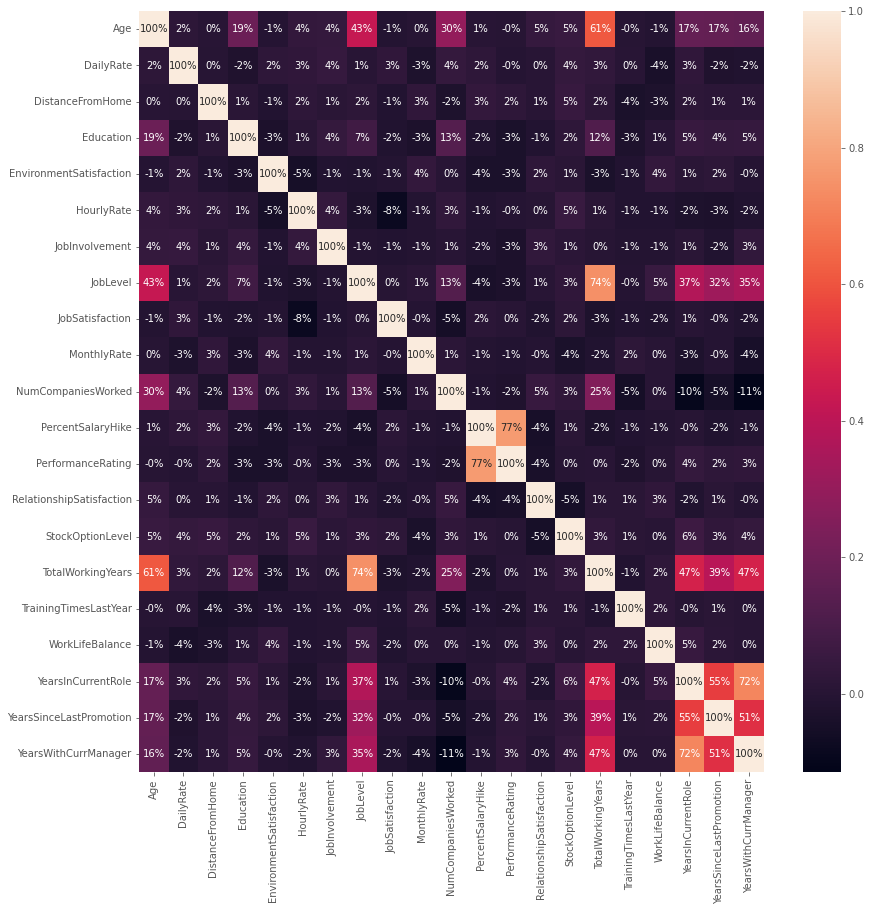

In [34]:
plt.figure(figsize=(14,14))  #14in by 14in
sns.heatmap(df.corr(), annot=True, fmt='.0%')

In [35]:
#Transform non-numeric columns into numerical columns
from sklearn.preprocessing import LabelEncoder

for column in df.columns:
        if df[column].dtype == np.number:
            continue
        df[column] = LabelEncoder().fit_transform(df[column])

In [36]:
#Create a new column at the end of the dataframe that contains the same value 
df['Age_Years'] = df['Age']
#Remove the first column called age 
df = df.drop('Age', axis = 1)
#Show the dataframe
df

,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Age_Years
0,1,2,611,2,0,1,1,1,0,64,2,1,7,3,2,968,8,1,0,0,0,0,8,0,0,4,0,5,23
1,0,1,109,1,7,0,1,2,1,31,1,1,6,1,1,1273,1,0,12,1,3,1,10,3,2,7,1,7,31
2,1,2,790,1,1,1,4,3,1,62,1,0,2,2,2,18,6,1,4,0,1,0,7,3,2,0,0,0,19
3,0,1,805,1,2,3,1,3,0,26,2,0,6,2,1,1180,1,1,0,0,2,0,8,3,2,7,3,0,15
4,0,2,303,1,1,0,3,0,1,10,2,0,2,1,1,824,9,0,1,0,3,1,6,3,2,2,2,2,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2935,0,1,482,1,22,1,3,2,1,11,3,1,2,3,1,583,4,0,6,0,2,1,17,3,2,2,0,3,18
2936,0,2,317,1,5,0,3,3,1,12,1,2,0,0,1,1083,4,0,4,0,0,1,9,5,2,7,1,7,21
2937,0,2,38,1,3,2,1,1,1,57,3,1,4,1,1,171,1,1,9,1,1,1,6,0,2,2,0,3,9
2938,0,1,566,2,1,2,3,3,1,33,1,1,7,1,1,623,2,0,3,0,3,0,17,3,1,6,0,8,31


In [37]:
#Split the data into independent 'X' and dependent 'Y' variables
X = df.iloc[:, 1:df.shape[1]].values 
Y = df.iloc[:, 0].values 

In [38]:
# Split the dataset into 75% Training set and 25% Testing set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 1)

### model development

# Decission  tree  classifier

In [39]:
# Split the data into Train-Test
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size =0.2)

In [40]:
X_train.shape

(2251, 28)

In [41]:
X_test.shape

(563, 28)

In [42]:
# build the decission tree with depth = 2
model_dt_2 = DecisionTreeClassifier(random_state=1, max_depth=2)
model_dt_2.fit(X_train, Y_train)
model_dt_2_score_train = model_dt_2.score(X_train, Y_train)
print("Training score: ",model_dt_2_score_train)
model_dt_2_score_test = model_dt_2.score(X_test, Y_test)
print("Testing score: ",model_dt_2_score_test)
#y_pred_dt = model_dt_2.predict_proba(x_test)[:, 1]


Training score:  0.8449577965348734
Testing score:  0.8241563055062167


In [43]:
# build the decission tree with depth = 4
model_dt_4 = DecisionTreeClassifier(random_state=1, max_depth=4)
model_dt_4.fit(X_train, Y_train)
model_dt_4_score_train = model_dt_4.score(X_train, Y_train)
print("Training score: ",model_dt_4_score_train)
model_dt_4_score_test = model_dt_4.score(X_test, Y_test)
print("Testing score: ",model_dt_4_score_test)

Training score:  0.8791648156374945
Testing score:  0.8330373001776199


In [44]:
# build the decission tree with depth = 8
model_dt_8 = DecisionTreeClassifier(random_state=1, max_depth=8,criterion = "gini")
model_dt_8.fit(X_train, Y_train)
model_dt_8_score_train = model_dt_8.score(X_train, Y_train)
print("Training score: ",model_dt_8_score_train)
model_dt_8_score_test = model_dt_8.score(X_test, Y_test)
print("Testing score: ",model_dt_8_score_test)

Training score:  0.9555752998667258
Testing score:  0.9076376554174067


In [45]:
model_dt = DecisionTreeClassifier(max_depth = 8, criterion ="entropy")
model_dt.fit(X_train, Y_train)
y_pred_dt = model_dt.predict_proba(X_test)[:, 1]

### Performance Metrics

In [46]:
fpr_dt, tpr_dt, _ = roc_curve(Y_test, y_pred_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

In [47]:
predictions = model_dt.predict(X_test)
predictions

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,

In [48]:
print(model_dt.score(X_test,Y_test))
y_actual_result=Y_test[0]

0.9094138543516874


In [49]:
for i in range(len(predictions)):
    if(predictions[i] == 1):
        y_actual_result = np.vstack((y_actual_result, Y_test[i]))

### Recall


In [50]:
y_actual_result = y_actual_result.flatten()
count = 0
for result in y_actual_result:
     if(result == 1):
        count=count+1

print ("true yes|predicted yes:")
print (count/float(len(y_actual_result)))

true yes|predicted yes:
0.7471264367816092


### Area under the curve


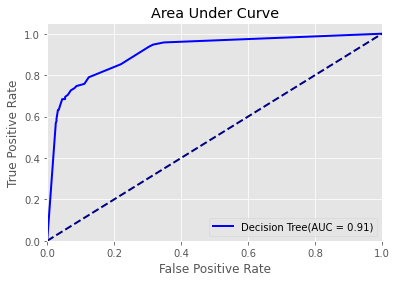

In [51]:
plt.figure(1)
lw = 2
plt.plot(fpr_dt, tpr_dt, color='blue',
         lw=lw, label='Decision Tree(AUC = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve')
plt.legend(loc="lower right")
plt.show()

### CONFUSION MATRIX

In [52]:
print (confusion_matrix(Y_test, predictions))

[[447  21]
 [ 30  65]]


In [53]:
accuracy_score(Y_test, predictions)

0.9094138543516874

In [54]:
 from sklearn.model_selection import GridSearchCV

# 2. Random Forest

In [55]:
lb = LabelEncoder()
y = lb.fit_transform(Y)

In [56]:
dum_BusinessTravel = pd.get_dummies(dataset['BusinessTravel'],
                                    prefix ='BusinessTravel')
  
dum_Department = pd.get_dummies(dataset['Department'],
                                prefix ='Department')
  
dum_EducationField = pd.get_dummies(dataset['EducationField'],
                                   prefix ='EducationField')
  
dum_Gender = pd.get_dummies(dataset['Gender'],
                           prefix ='Gender', drop_first = True)
dum_JobRole = pd.get_dummies(dataset['JobRole'],
  
                            prefix ='JobRole')
  
dum_MaritalStatus = pd.get_dummies(dataset['MaritalStatus'],
  
                                  prefix ='MaritalStatus')
    


In [57]:
# split the data 
X = df.iloc[:,1:df.shape[1]].values
Y = df.iloc[:,0].values

In [58]:
from sklearn.model_selection import train_test_split
  
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [59]:
rf = RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
print(rf.fit(X_train, Y_train))


RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)


In [60]:

  
def print_score(clf, X_train, Y_train,
                X_test, Y_test,
                train=True):
  
    if train:
        print("Train Result:")
        print("------------")
        print("Classification Report: \n {}\n".format(classification_report(
            Y_train, clf.predict(X_train))))
  
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(
            Y_train, clf.predict(X_train))))
  
        res = cross_val_score(clf, X_train, Y_train,
                              cv=10, scoring='accuracy')
  
        print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
        print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))
        print("----------------------------------------------------------")
  
    elif train == False:
  
        print("Test Result:")
        print("-----------")
        print("Classification Report: \n {}\n".format(
            classification_report(Y_test, clf.predict(X_test))))
  
        print("Confusion Matrix: \n {}\n".format(
            confusion_matrix(Y_test, clf.predict(X_test))))
  
        print("accuracy score: {0:.4f}\n".format(
            accuracy_score(Y_test, clf.predict(X_test))))
  
        print("-----------------------------------------------------------")
print_score(rf, X_train, Y_train,
            X_test, Y_test,
            train=True)
  
print_score(rf, X_train, Y_train,
            X_test, Y_test,
            train=False)


Train Result:
------------
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      1778
           1       1.00      0.97      0.98       332

    accuracy                           0.99      2110
   macro avg       1.00      0.98      0.99      2110
weighted avg       0.99      0.99      0.99      2110


Confusion Matrix: 
 [[1778    0]
 [  11  321]]

Average Accuracy: 	 0.9351
Accuracy SD: 		 0.0164
----------------------------------------------------------
Test Result:
-----------
Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.99      0.96       572
           1       0.93      0.75      0.83       132

    accuracy                           0.94       704
   macro avg       0.93      0.87      0.90       704
weighted avg       0.94      0.94      0.94       704


Confusion Matrix: 
 [[564   8]
 [ 33  99]]

accuracy score: 0.9418

-----------------

# Logistic Regression Model

In [61]:
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()
# fit the model with data
logreg.fit(X_train,Y_train)

LogisticRegression()

In [73]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X = sc.fit_transform(X)

In [74]:
mean = np.mean(X, axis=0)
print('Mean: (%d,%d)' % (mean[0],mean[1]))
standard_deviation = np.std(X,axis=0)
print('Standard Deviation: (%d,%d)' %(standard_deviation[0],standard_deviation[1]))

Mean: (0,0)
Standard Deviation: (1,1)


In [64]:
print(X[0:10,:])

[[ 0.593247    0.71416398  1.40004091 -1.01712923 -0.87555981 -0.93886356
  -0.65311178 -1.23166336  1.37858977  0.37719846  0.0298014   1.00777242
   1.15375486  1.23006109  0.72889363  2.14520622  1.59782049 -1.15494535
  -0.42586406 -1.57804019 -0.93254929 -0.36060351 -2.18345173 -2.4947833
  -0.03271854 -0.67724431  0.28541098  0.55979624]
 [-0.90800935 -1.30198369 -0.501366   -0.15159391 -1.85482266 -0.93886356
   0.26215543  0.81191016 -0.24477573 -1.03054221  0.0298014   0.60529277
  -0.66002513 -0.13699732  1.50214418 -0.66401277 -0.62585253  2.13454474
   2.34816713  1.19849489  0.23583615 -0.05028599  0.14626257  0.33143256
   0.80938494 -0.34934247  0.85908705  1.48998024]
 [ 0.593247    1.43306923 -0.501366   -0.89348133 -0.87555981  1.30262009
   1.17742263  0.81191016  1.28020398 -1.03054221 -0.94532808 -1.00462581
   0.24686487  1.23006109 -1.6795917   1.34257222  1.59782049 -0.05844865
  -0.42586406 -0.6525285  -0.93254929 -0.51576226  0.14626257  0.33143256
  -1.155523

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.2,random_state=400)

In [66]:
y_pred = logreg.predict(X_test)

In [67]:
y_pred

array([1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,

In [68]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test,y_pred)
cnf_matrix

array([[265, 203],
       [ 14,  81]], dtype=int64)

In [69]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.6145648312611013
Precision: 0.2852112676056338
Recall: 0.8526315789473684


In [70]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]


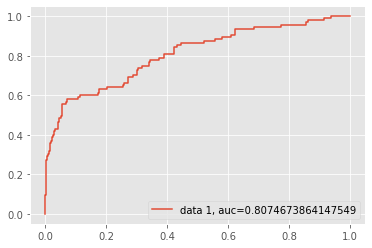

In [71]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

## By the above models i got more accuracy using random forest  (i.e) with 94% accuracy.

## whereas using decision tree classification we can see there is 90% accuracy.